In [1]:
from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt
data = load_iris()

In [2]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
data.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Split dataset and Train model

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,test_size=0.2)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(StandardScaler(),LogisticRegression())
pipe.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
pipe.score(X_test,Y_test)

0.9333333333333333

In [24]:
pipe.predict([data.data[50]])

array([1])

In [25]:
data.target[0]

0

In [27]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
pipe.predict(data.data[0:5])

array([0, 0, 0, 0, 0])

In [29]:
data.target[0:5]

array([0, 0, 0, 0, 0])

Confusion Matrix

In [30]:
Y_predicted=pipe.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  8]])

Text(69.0, 0.5, 'Truth')

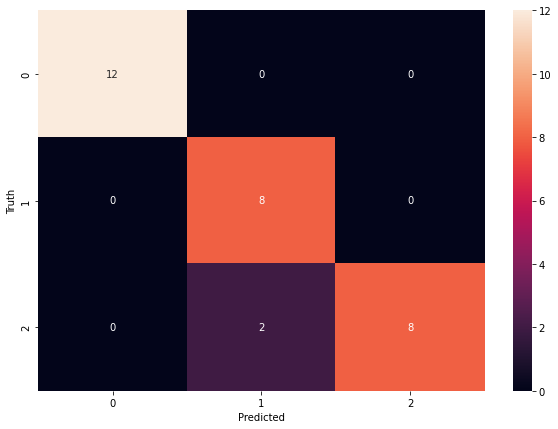

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')